# Name:R.Ramakrishna Raju

# Batch:09012021



# Dimension Reduction (PCA )

#Q2) A Pharmaceutical drug manufacturing company is studying on a new medicine to treat Heart diseases, it has gathered data from #its secondary sources, and it would like you to provide high level analytical insights on the data, its aim is to segregate #patients depending on their age group and other factors as given in the data, perform PCA and Clustering Machine learning #Algorithm on the dataset given, and check if the clusters formed before and after PCA are same and provide a brief report on #your model. You can also explore more on ways to improve your model. 

# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

# importing Dataset

In [3]:
heart= pd.read_csv(r"F:\360\Dimension reduction(PCA and SVM)\heart disease.csv")
heart.describe()
h1=heart.drop(["age"], axis = 1)
h1

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Normalizing the numerical data 



In [94]:

h =heart.iloc[:, 1:]

In [95]:
heart_norm = scale(h)
heart_norm


array([[ 1.97312292,  0.76395577, -0.25633371, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [ 1.00257707, -0.09273778,  0.07219949, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [ 0.03203122, -0.09273778, -0.81677269, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [-0.93851463,  0.70684287, -1.029353  , ...,  1.24459328,
         1.12302895, -1.09345881],
       [-0.93851463, -0.09273778, -2.2275329 , ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.03203122, -0.09273778, -0.19835726, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [99]:
pca = PCA(n_components = 12)
pca_values = pca.fit_transform(heart_norm)

# The amount of variance that each PCA explains is 


In [100]:
var = pca.explained_variance_ratio_
var
pca.components_
pca.components_[0]

array([-0.30281275,  0.13412225,  0.08908244,  0.03887683, -0.10787819,
       -0.37011118,  0.36298143,  0.38942102, -0.34746976,  0.25595088,
        0.23379644, -0.45600162])

# Cumulative variance 




In [101]:
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([25.83, 37.18, 47.22, 55.76, 63.91, 70.96, 77.74, 84.09, 89.05,
       93.53, 96.85, 99.99])

# Variance plot for PCA components obtained 


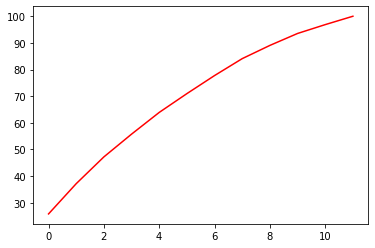

In [102]:
plt.plot(var1, color = "red")

# PCA scores


In [111]:
pca_values

pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5", "comp6","comp7","comp8","comp9","comp10","comp11"
f = pd.concat([heart.age, pca_data.iloc[:, 0:3]], axis = 1)

# Scatter diagram


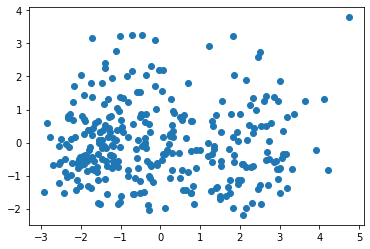

In [113]:
import matplotlib.pylab as plt
plt.scatter(x = f.comp0, y = f.comp1)